<span style="font-size:20px;font-weight:bold">Project on Vaccination Rates in Los Angeles and it's Neighborhood</span>

<span style="font-size:17px;font-weight:bold">Overview</span><br>
<span style="font-size:15px;">This report provides an analysis of vaccination rates by neighborhood in Los Angeles. It aims to understand the distribution 
of vaccination coverage across different areas within the city and identify any disparities or trends that may exist. The 
analysis focuses on the percentage of people fully vaccinated and the percentage of people with at least one dose of the 
COVID-19 vaccine.</span>

<span style="font-size:17px;font-weight:bold">Objective</span><br>
<span style="font-size:15px;">The analysis seeks to accomplish the following goals:<br>
- assess the extent of COVID-19 vaccination coverage across various neighborhoods in Los Angeles.<br>
- Highlight any disparities or inequities in vaccination coverage between neighborhoods.<br>
- Examining the dependency of vaccination and mortality rates<br>
</span>

<span style="font-size:17px;font-weight:bold">Data Description</span><br>
<span style="font-size:15px;">
- CITY_TYPE: Type of city.<br>
- CITY: Name of the city.<br>
- COMMUNITY: Name of the community.<br>
- LABEL: Label of the city/community.<br>
- City_Community: Combined city and community label.<br>
- Cases: Number of COVID-19 cases.<br>
- Case_Rate: COVID-19 case rate per 100,000 people.<br>
- Deaths: Number of COVID-19 deaths.<br>
- Death_Rate: COVID-19 death rate per 100,000 people.<br>
- Percent_of_People_with_1__Dose: Percentage of people who have received at least one dose of the vaccine.<br>
- Percent_of_People_Fully_Vaccinated: Percentage of people fully vaccinated.<br>
</span>

<span style="font-size:18px;font-weight:bold">Getting the Right Environment</span>

In [125]:
#import Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<span style="font-size:20px;font-weight:bold">Reading and Understanding the Datasets</span>

In [126]:
#Loading the dataset
df=pd.read_csv('Vaccination_Rates_by_Neighborhood.csv')

In [127]:
#Display the first 5 rows of the dataset
df.head()

,CITY_TYPE,CITY,COMMUNITY,LABEL,City_Community,Cases,Case_Rate,Deaths,Death_Rate,Percent_of_People_with_1__Dose,Percent_of_People_Fully_Vaccinated
0,City,Agoura Hills,,City of Agoura Hills,City of Agoura Hills,4220,20208.0,22,105.0,0.85,0.80
1,City,Alhambra,,City of Alhambra,City of Alhambra,17044,19653.0,255,294.0,0.87,0.81
2,City,Arcadia,,City of Arcadia,City of Arcadia,8145,14103.0,165,286.0,0.91,0.84
3,City,Artesia,,City of Artesia,City of Artesia,4186,24924.0,88,524.0,0.87,0.80
4,City,Avalon,,City of Avalon,City of Avalon,63,1628.0,0,0.0,0.27,0.23


In [128]:
#Display the number of rows and columns
print(df.shape)

(341, 11)


In [129]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CITY_TYPE                           341 non-null    object 
 1   CITY                                341 non-null    object 
 2   COMMUNITY                           341 non-null    object 
 3   LABEL                               341 non-null    object 
 4   City_Community                      341 non-null    object 
 5   Cases                               341 non-null    int64  
 6   Case_Rate                           339 non-null    float64
 7   Deaths                              341 non-null    int64  
 8   Death_Rate                          339 non-null    float64
 9   Percent_of_People_with_1__Dose      340 non-null    float64
 10  Percent_of_People_Fully_Vaccinated  340 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usa

In [130]:
#Descriptive statistics for numerical columns in the DataFrame.
df.describe()

,Cases,Case_Rate,Deaths,Death_Rate,Percent_of_People_with_1__Dose,Percent_of_People_Fully_Vaccinated
count,341.000000,339.000000,341.000000,339.000000,340.000000,340.000000
mean,8180.964809,29345.171091,93.272727,380.920354,0.699529,0.683088
std,11987.991290,39349.567669,137.122033,1382.866199,0.254973,0.186643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,753.000000,19171.000000,6.000000,144.000000,0.720000,0.660000
50%,3998.000000,24942.000000,38.000000,264.000000,0.785000,0.720000
75%,10573.000000,31555.000000,132.000000,374.000000,0.840000,0.780000
max,125823.000000,541667.000000,1264.000000,24074.000000,0.950000,0.950000


In [136]:
#Total value counts in the crime code description column
updated = df['City_Community'].value_counts()
print(updated)

City_Community
City of Agoura Hills                        1
Unincorporated - Angeles National Forest    1
Unincorporated - Bradbury                   1
Unincorporated - Bouquet Canyon             1
Unincorporated - Bassett                    1
                                           ..
Los Angeles - Los Feliz                     1
Los Angeles - Longwood                      1
Los Angeles - Little Tokyo                  1
Los Angeles - Little Bangladesh             1
City of Pomona                              1
Name: count, Length: 341, dtype: int64


In [53]:
#Sum of null values in each columns
print(df.isnull().sum())

CITY_TYPE                             0
CITY                                  0
COMMUNITY                             0
LABEL                                 0
City_Community                        0
Cases                                 0
Case_Rate                             2
Deaths                                0
Death_Rate                            2
Percent_of_People_with_1__Dose        1
Percent_of_People_Fully_Vaccinated    1
dtype: int64


In [54]:
#Sum of duplicates
sum(df.duplicated())

0

> #### Identifying continuos and categorical columns

In [55]:
# Threshold for considering a column as categorical based on unique values
unique_value_threshold = 10

# Identify continuous and categorical columns
continuous = []
categorical = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > unique_value_threshold:
        continuous.append(col)
    else:
        categorical.append(col)

print("Continuous Columns:", continuous)
print("Categorical Columns:", categorical)

Continuous Columns: ['Cases', 'Case_Rate', 'Deaths', 'Death_Rate', 'Percent_of_People_with_1__Dose', 'Percent_of_People_Fully_Vaccinated']
Categorical Columns: ['CITY_TYPE', 'CITY', 'COMMUNITY', 'LABEL', 'City_Community']


<span style="font-size:18px;font-weight:bold">Preprocessing the data</span>

In [56]:
# Drop unnecessary columns
columns_to_drop = ['LABEL', 'COMMUNITY'] #Dropping both columns because the information is already available in the 'City_Community' column.
# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [58]:
# Remove rows with missing values
df = df.dropna()

In [59]:
print(df.isnull().sum())

CITY_TYPE                             0
CITY                                  0
City_Community                        0
Cases                                 0
Case_Rate                             0
Deaths                                0
Death_Rate                            0
Percent_of_People_with_1__Dose        0
Percent_of_People_Fully_Vaccinated    0
dtype: int64


<span style="font-size:18px;font-weight:bold">Exploratory Analysis</span>

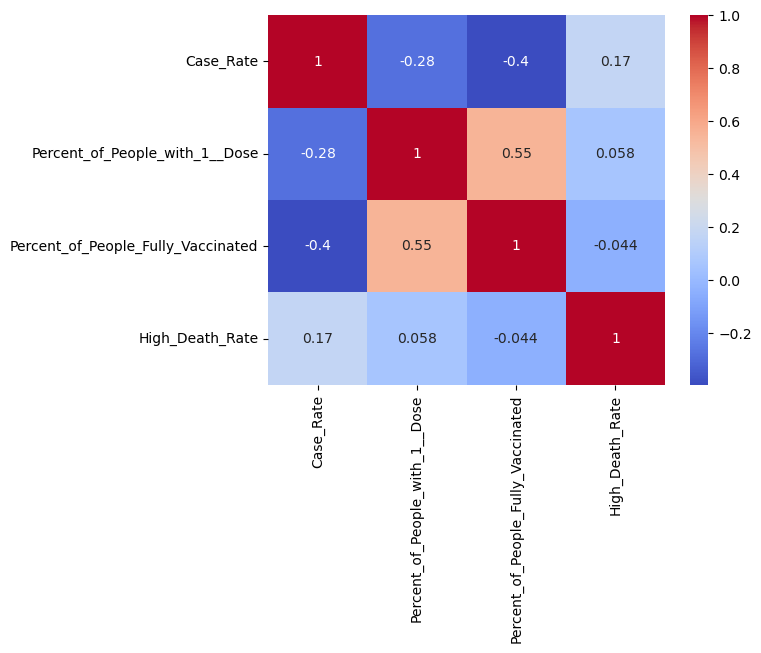

In [65]:

# Correlation analysis
corr = df[features + ['High_Death_Rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


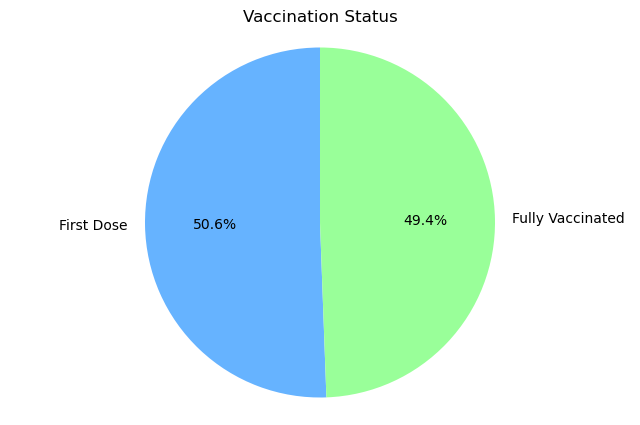

In [75]:
total_first_dose = df['Percent_of_People_with_1__Dose'].sum()
total_fully_vaccinated = df['Percent_of_People_Fully_Vaccinated'].sum()

# Prepare data for pie chart
labels = ['First Dose', 'Fully Vaccinated']
sizes = [total_first_dose, total_fully_vaccinated]

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%0.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Vaccination Status')
plt.show()

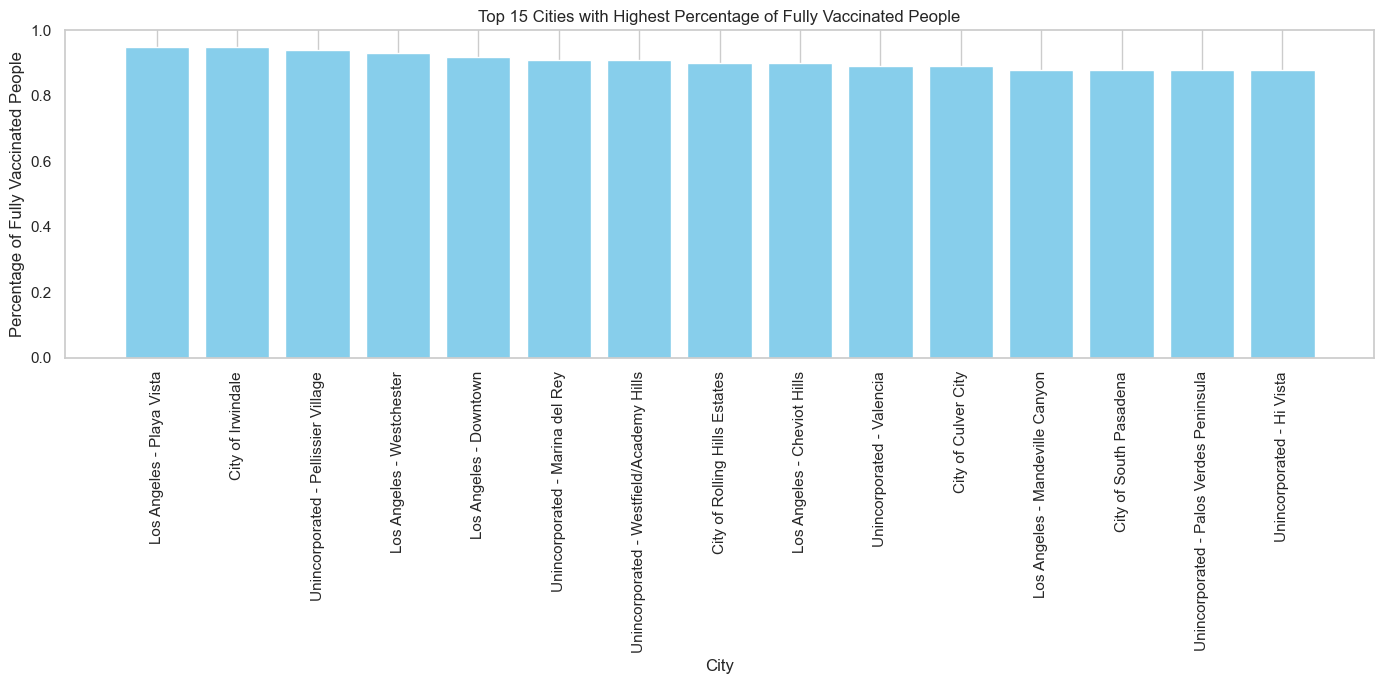

In [144]:
# Sort DataFrame by 'Percent_of_People_Fully_Vaccinated' column in descending order
df_sorted = df.sort_values(by='Percent_of_People_Fully_Vaccinated', ascending=False)

# Select the top 15 rows
top_15_df = df_sorted.head(15)

# Create bar chart
plt.figure(figsize=(14, 7))
plt.bar(top_15_df['City_Community'], top_15_df['Percent_of_People_Fully_Vaccinated'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Percentage of Fully Vaccinated People')
plt.title('Top 15 Cities with Highest Percentage of Fully Vaccinated People')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

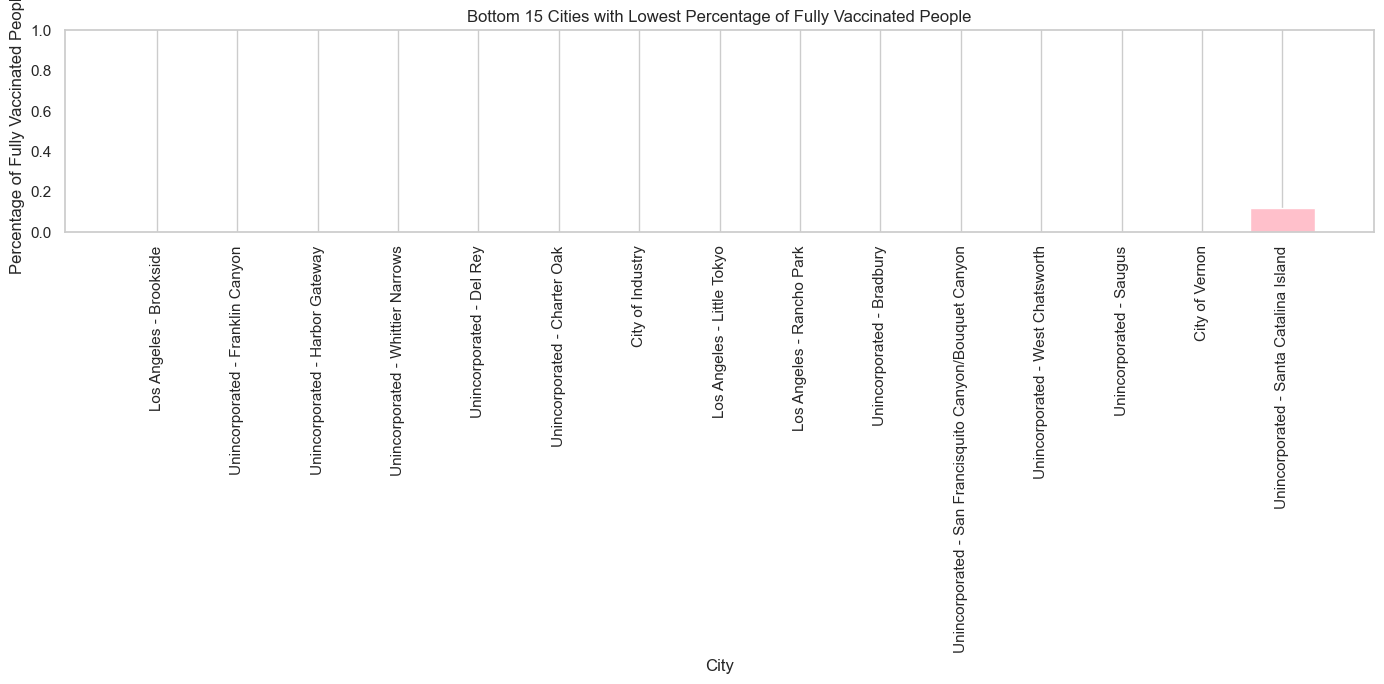

In [146]:
# Sort DataFrame by 'Percent_of_People_Fully_Vaccinated' column in ascending order
df_sorted = df.sort_values(by='Percent_of_People_Fully_Vaccinated')

# Select the bottom 15 rows
bottom_15_df = df_sorted.head(15)

# Create bar chart
plt.figure(figsize=(14, 7))
plt.bar(bottom_15_df['City_Community'], bottom_15_df['Percent_of_People_Fully_Vaccinated'], color='pink')
plt.xlabel('City')
plt.ylabel('Percentage of Fully Vaccinated People')
plt.title('Bottom 15 Cities with Lowest Percentage of Fully Vaccinated People')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

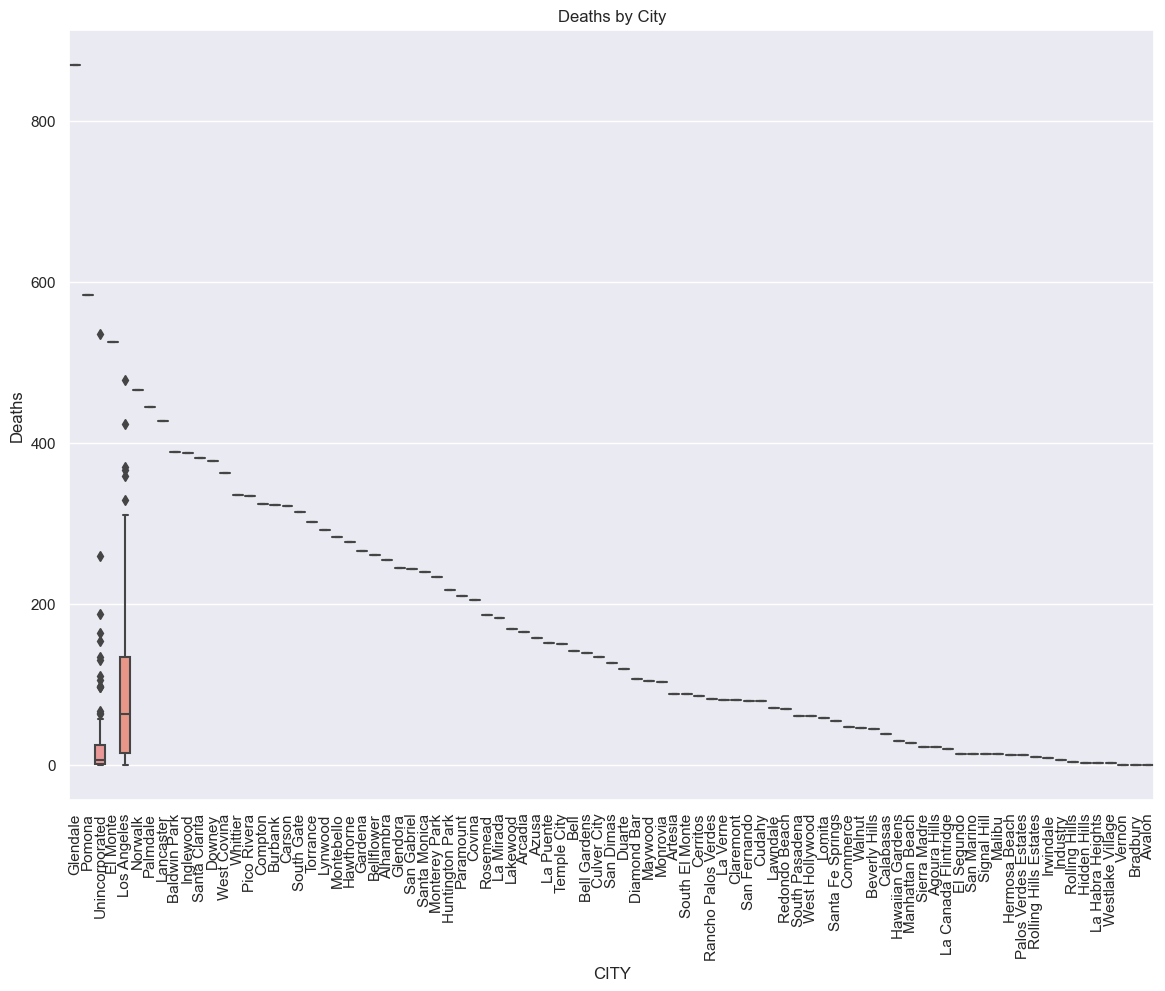

In [95]:
# Box plot for Deaths by City
plt.figure(figsize=(14, 10))
sns.boxplot(x='CITY', y='Deaths', data=df)
plt.xticks(rotation=90)
plt.title('Deaths by City')
plt.show()


C:\Users\meera\AppData\Local\Temp\ipykernel_18160\1705555131.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Deaths'], shade=True, color='r')


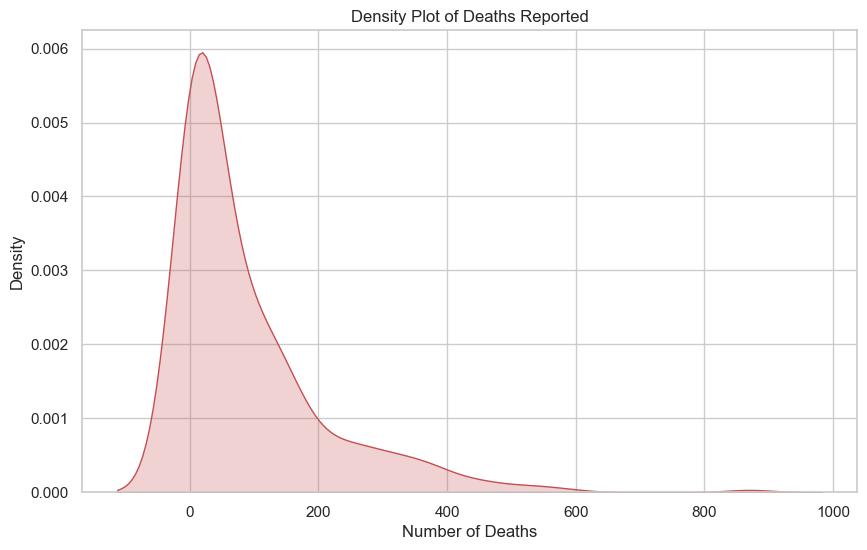

In [99]:
# Generate density plots for Deaths
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Deaths'], shade=True, color='r')
plt.title('Density Plot of Deaths Reported')
plt.xlabel('Number of Deaths')
plt.ylabel('Density')
plt.show()

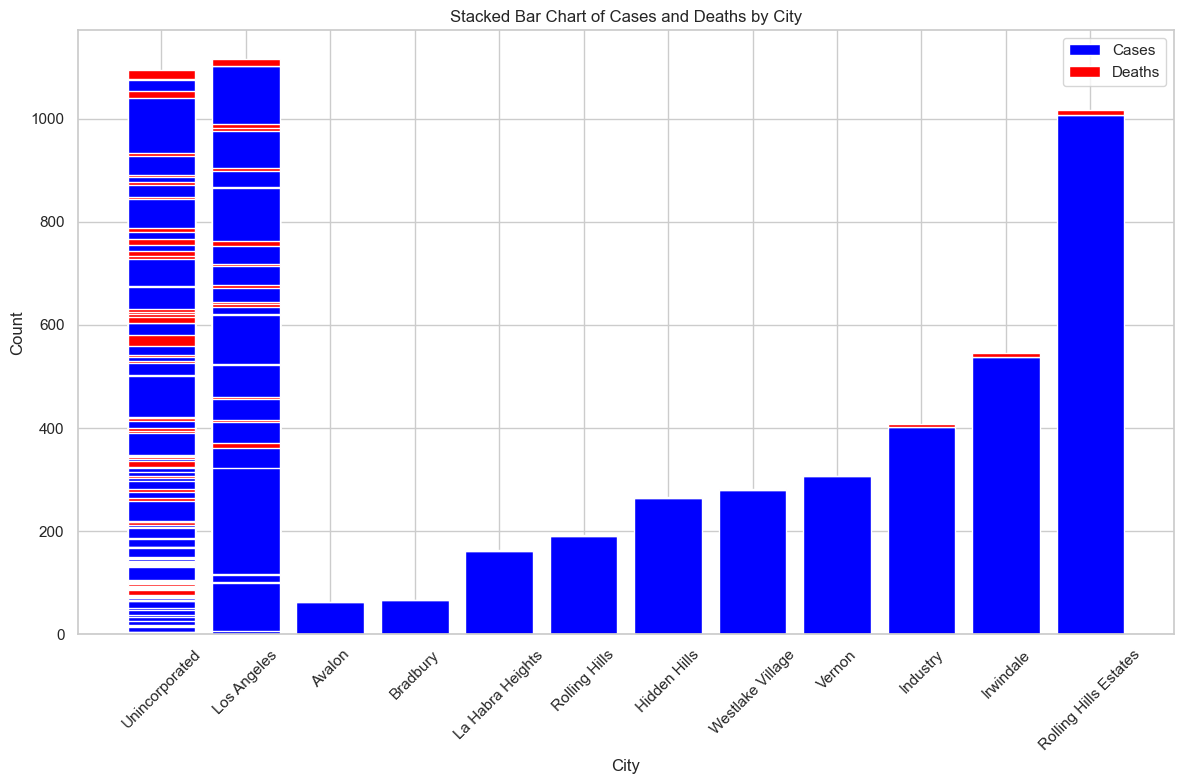

In [106]:
# Sorting the data by Deaths in ascending order and taking the first 10
data_sorted = df.sort_values('Cases').head(100)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))

# Plotting
plt.bar(data_sorted['CITY'], data_sorted['Cases'], label='Cases', color='blue')
plt.bar(data_sorted['CITY'], data_sorted['Deaths'], bottom=data_sorted['Cases'], label='Deaths', color='red')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Cases and Deaths by City')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<span style="font-size:18px;font-weight:bold">Linear Regression</span>

In [117]:
# Define the features and the target variable
X = df[['Cases', 'Percent_of_People_Fully_Vaccinated', 'Percent_of_People_with_1__Dose']]
y = df['Deaths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
from sklearn.linear_model import LinearRegression
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2075.302337896868
Mean Absolute Error: 28.320864588032634
R^2 Score: 0.833646014753451


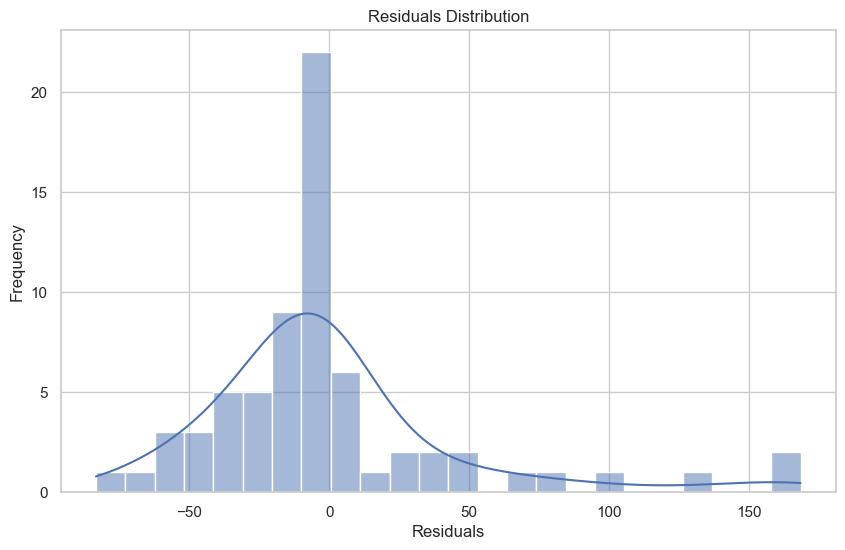

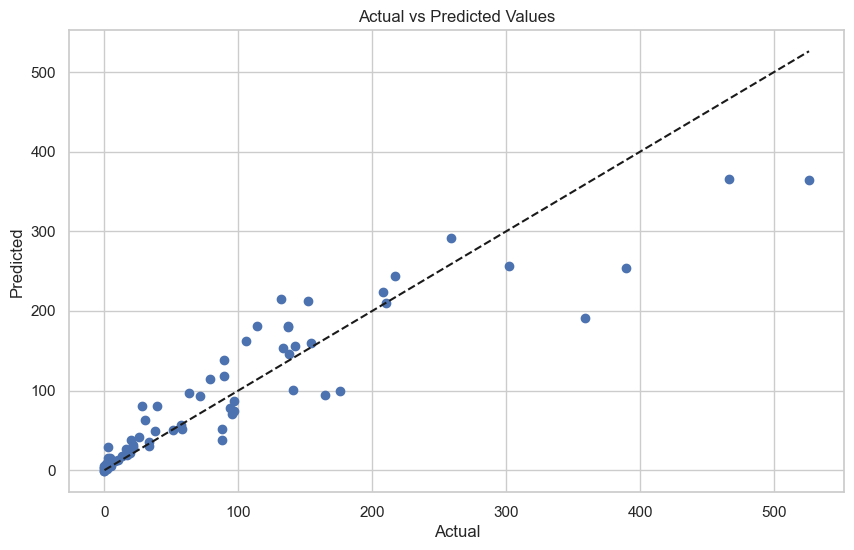

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


<span style="font-size:18px;font-weight:bold">Conclusion</span>
- An R² score of 0.8336 means that approximately 83.36% of the variance in the death counts can be explained by the model.
  This is generally considered a good fit, as it suggests that the model captures most of the variability in the target variable.<br>
- The stacked bar chart indicates that the highest number of cases were reported in the city of Los Angeles, followed by various unincorporated regions and the city of Rolling Hills Estates.<br>
- Only 49.4% of the total population is fully vaccinated, while the remainder have only received one dose of the vaccine.<br>
- The bar graphs clearly demonstrate that cities with the highest full vaccination rates have reported significantly fewer cases and deaths.<br>
- Many unincorporated areas have a zero percent full vaccination rate, which is evidently linked to their leading position in death rates.<br>